<a href="https://colab.research.google.com/github/call-me-3v/U.S.A.-birth-analysis/blob/master/US_births_2000_2014_SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

United State of America birth analysis from 2000 to 2014

In [1]:
import json
import requests
import pandas as pd
import io
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import seaborn; seaborn.set()
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data  = files.upload()

Saving US_births_2000-2014_SSA.csv to US_births_2000-2014_SSA.csv


In [3]:
df = pd.read_csv(io.StringIO(data['US_births_2000-2014_SSA.csv'].decode('utf-8')))

In [4]:
df.head(5)

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [5]:
df.dtypes

year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object

In [6]:
df.isnull().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

In [31]:
df1 = df.replace({'day_of_week':{1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}})

In [37]:
df2= df1.replace({'month':{1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}})

In [38]:
df2

,year,month,date_of_month,day_of_week,births
0,2000,January,1,Saturday,9083
1,2000,January,2,Sunday,8006
2,2000,January,3,Monday,11363
3,2000,January,4,Tuesday,13032
4,2000,January,5,Wednesday,12558
...,...,...,...,...,...
5474,2014,December,27,Saturday,8656
5475,2014,December,28,Sunday,7724
5476,2014,December,29,Monday,12811
5477,2014,December,30,Tuesday,13634


In [41]:
df2['births'].describe()

count     5479.000000
mean     11350.068261
std       2325.821049
min       5728.000000
25%       8740.000000
50%      12343.000000
75%      13082.000000
max      16081.000000
Name: births, dtype: float64

       index  FuncGroup
0  Wednesday        783
1    Tuesday        783
2     Monday        783
3     Sunday        783
4   Saturday        783
5   Thursday        782
6     Friday        782


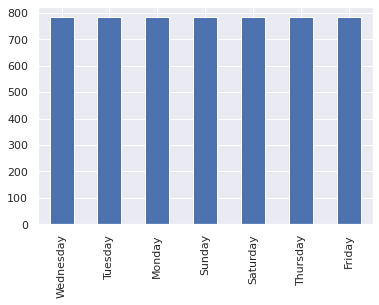

In [42]:
df3 = pd.DataFrame({'FuncGroup': df2['day_of_week']})
s = df3['FuncGroup'].value_counts()
s.plot(kind='bar')
dfout = df3['FuncGroup'].value_counts().reset_index()
print(dfout)


        index  FuncGroup
0       March        465
1      August        465
2         May        465
3     October        465
4     January        465
5        July        465
6    December        465
7    November        450
8       April        450
9   September        450
10       June        450
11   February        424


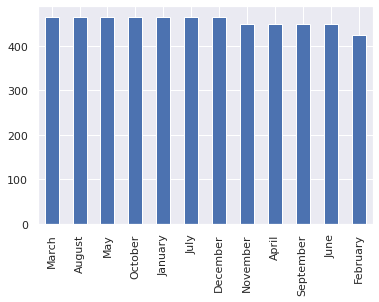

In [39]:
df4 = pd.DataFrame({'FuncGroup': df2['month']})
s = df4['FuncGroup'].value_counts()
s.plot(kind='bar')
dfout = df4['FuncGroup'].value_counts().reset_index()
print(dfout)